In [20]:
import pandas as pd
import numpy as ny
import matplotlib.pyplot as plt
import numpy as np

In [21]:
data1 = pd.read_csv("/Users/leticiaamorim/Desktop/CFG/press-freedom/press-freedom/data/Report_2020.csv")
data2 = pd.read_csv("/Users/leticiaamorim/Desktop/CFG/press-freedom/press-freedom/data/Report_2021.csv")
data3 = pd.read_csv("/Users/leticiaamorim/Desktop/CFG/press-freedom/press-freedom/data/Report_2022.csv")


In [22]:
df1 = data1[['Country', 'Position 2019', 'Position 2020']]

df1

,Country,Position 2019,Position 2020
0,Afghanistan,121,122
1,Albania,82,84
2,Algeria,141,146
3,Andorra,37,37
4,Angola,109,106
...,...,...,...
175,Venezuela,148,147
176,Vietnam,176,175
177,Yemen,168,167
178,Zambia,119,120


In [23]:
df2 = data2[['Country', 'Position 2021']]

df2

,Country,Position 2021
0,Afghanistan,122
1,Albania,83
2,Algeria,146
3,Andorra,39
4,Angola,103
...,...,...
175,Venezuela,148
176,Vietnam,175
177,Yemen,169
178,Zambia,115


In [24]:
dfs = pd.merge(df1, df2, on='Country', how='inner')
dfs

,Country,Position 2019,Position 2020,Position 2021
0,Afghanistan,121,122,122
1,Albania,82,84,83
2,Algeria,141,146,146
3,Andorra,37,37,39
4,Angola,109,106,103
...,...,...,...,...
175,Venezuela,148,147,148
176,Vietnam,176,175,175
177,Yemen,168,167,169
178,Zambia,119,120,115


In [25]:
dfs = dfs.replace(['South al America'],'Latin America')
dfs = dfs.replace(['South America'],'Latin America')
dfs = dfs.replace(['Arab States'],'Middle  East')

In [26]:
lower_positions = dfs.sort_values(by=["Position 2019", "Position 2020", "Position 2021"],ascending=[False, False, False])

In [27]:
# lower_positions.drop(['Region'])

In [28]:
df = lower_positions.head(25)

df

,Country,Position 2019,Position 2020,Position 2021
167,Turkmenistan,180,179,178
118,North Korea,179,180,179
49,Eritrea,178,178,180
32,China,177,177,177
176,Vietnam,176,175,175
152,Sudan,175,159,159
156,Syria,174,174,173
43,Djibouti,173,176,176
138,Saudi Arabia,172,170,170
87,Laos,171,172,172


In [29]:
df_reset=df.reset_index(drop=True)

In [30]:
df_reset.to_csv("Lower_positions.csv")

In [31]:
# Most letal countries
letality1 = data1[['Country', 'Region', 'Journalist Killed']]

letality1

,Country,Region,Journalist Killed
0,Afghanistan,Asia Pacific,4
1,Albania,Europe,0
2,Algeria,Arab States,0
3,Andorra,Europe,0
4,Angola,Africa,0
...,...,...,...
175,Venezuela,South America,1
176,Vietnam,Asia Pacific,0
177,Yemen,Middle East,2
178,Zambia,Africa,0


In [32]:
letality2 = data2[['Country', 'Journalist Killed']]
letality2

,Country,Journalist Killed
0,Afghanistan,3
1,Albania,0
2,Algeria,0
3,Andorra,0
4,Angola,0
...,...,...
175,Venezuela,0
176,Vietnam,0
177,Yemen,4
178,Zambia,0


In [33]:
general_letality = pd.merge(letality1, letality2, on='Country', how='inner')



In [34]:
general_letality.rename(columns = {'Journalist Killed_x':'2020', 'Journalist Killed_y':'2021'}, inplace = True)
general_letality_df = general_letality.sort_values(by=['2020'],ascending=[False]).head(15)

general_letality_df

,Country,Region,2020,2021
104,Mexico,South America,8,7
0,Afghanistan,Asia Pacific,4,3
156,Syria,Middle East,4,1
74,Iraq,Middle East,4,0
71,India,Asia Pacific,4,4
67,Honduras,South America,4,0
124,Pakistan,Asia Pacific,4,3
130,Philippines,Asia Pacific,4,2
177,Yemen,Middle East,2,4
117,Nigeria,Africa,2,0


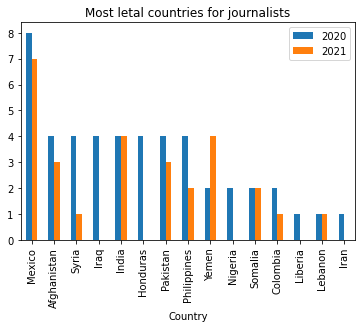

In [35]:
general_letality_df.plot.bar(
    x="Country",
    title="Most letal countries for journalists"
    );
     


In [36]:
plt.savefig('most-letal.png', dpi=300, bbox_inches='tight')


<Figure size 432x288 with 0 Axes>